# Linear Regression Task:

### Task Description: 
    Apply linear regression on the given dataset from scratch without using the scikit-learn package for creating the model (train_test_split and accuracy scores may be imported).
    Dependent variable: Quality
    

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns

from sklearn.metrics import r2_score

In [14]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Checking for null values:

In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values.

<Axes: >

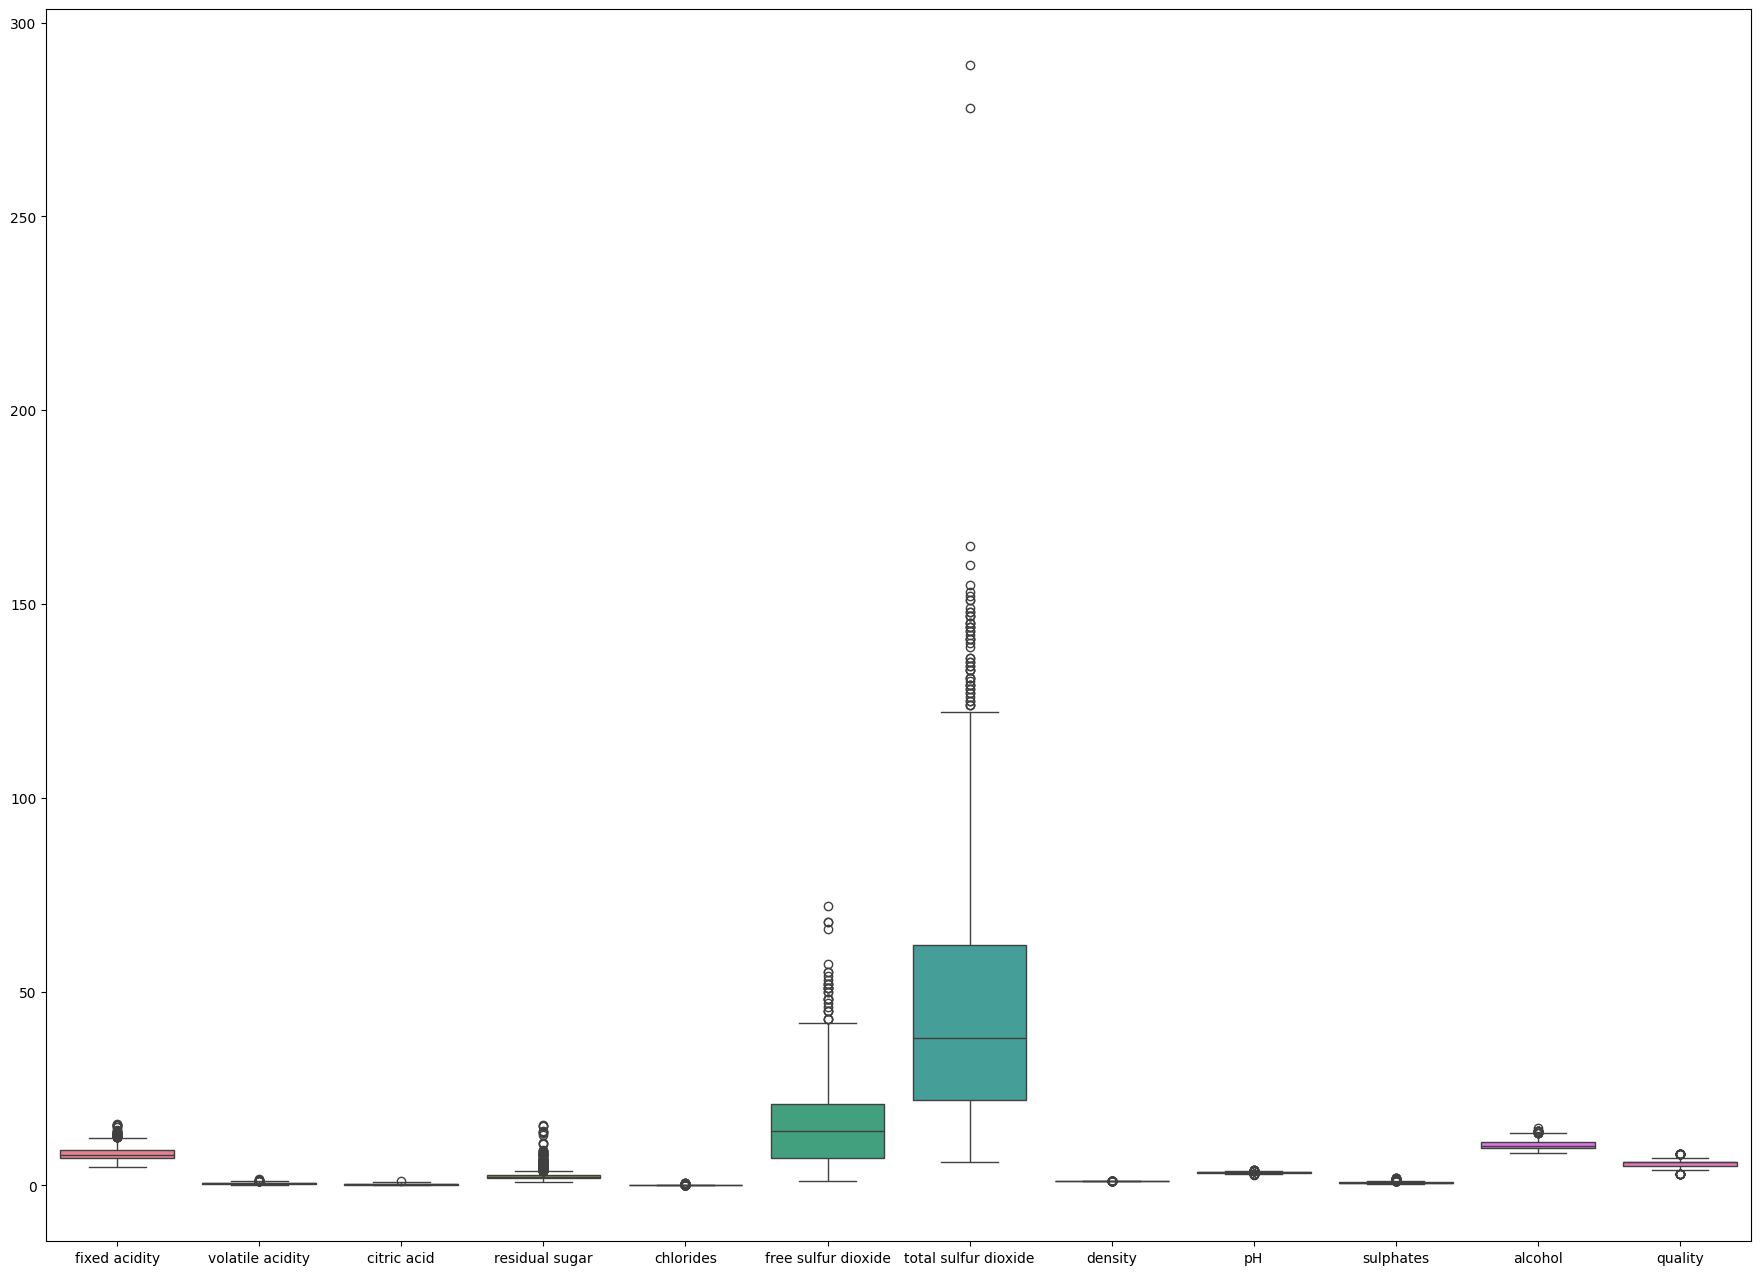

In [17]:
plt.figure(figsize=(22,16))
sns.boxplot(df)

#### Splitting into dependent and indepent variables and normalising:

In [18]:

def normalize(range):
    return (range - np.mean(range, axis=0)) / np.std(range, axis=0)

for column in df.columns:
    df[column]=normalize(df[column])

x_normalised=df.drop(columns = "quality")
y_normalised=df["quality"]

In [19]:
x_normalised

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_normalised,y_normalised,test_size=0.2,random_state=23)

#### Gradient descent and cost function:

In [20]:
def gradient_descent(x, y, w, b, iterations,alpha):
    cost_val=[0]*iterations

    for i in range(iterations):
        y_func= np.dot(x,w) + b
        
        
        delW = np.dot(y_func-y,x) / len(y)  #(x,diff) and (diff, x_Transpose) doesn't work bec shapes, look into it later. ****Need to understand shapes (and numpy in general) better***
        delB = np.sum(y_func-y) / len(y)
        
        w-= alpha*delW
        b-= alpha*delB
        
        cost_val[i]=np.sum(np.square(((x.dot(w)+b)-y))/(2*len(y)))
    
    return w,b,cost_val


In [21]:
w_initial=np.zeros(x_train.shape[1])
b_initial=0
w_opt,b_opt,cost_values=gradient_descent(x_train,y_train,w_initial,b_initial,iterations=1000,alpha=0.05)

#### Accuracy score:

In [22]:
y_predicted =np.dot(x_test,w_opt)+b_opt

#print(np.shape(x_test))
#print(np.shape(w_opt))

print(f"Score: {r2_score(y_test,y_predicted)*100}%")

(320, 11)
(11,)
Score: 42.99420174518902%


#### Learning Curve:


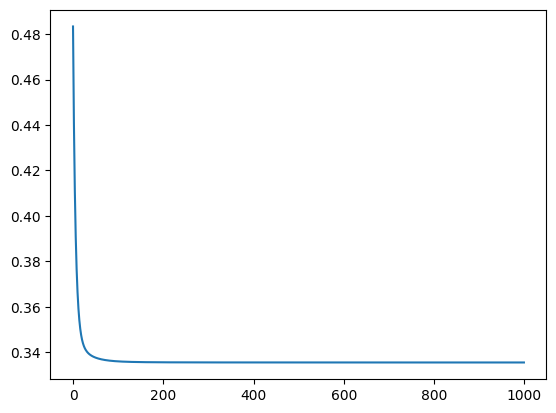

In [23]:
plt.plot(cost_values)

#### Plotting linear regression line:

In [24]:
#x_plot=np.linspace(np.min(x_test.iloc[:,0]),np.max(x_test.iloc[:,0]), 100)
#y_plot = w_opt[0]*x_plot+b_opt
#sns.regplot(x=x_plot,y=y_plot,data=df)
#plt.xlim(-3, 2)
#plt.show()